In [1]:
# Set up, diambil dari 04_training_linear_models.ipynb

In [4]:
#simple ML
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [5]:
import sklearn
import math

In [4]:
sin_titik=201
sin_x= numpy.linspace(0, 1, sin_titik).reshape(sin_titik, 1)
sin_y= numpy.ones(sin_titik)
for i in range(sin_titik):    
    sin_y[i]=math.sin(2*math.pi*sin_x[i])
    # print(sin_x[i],sin_y[i])

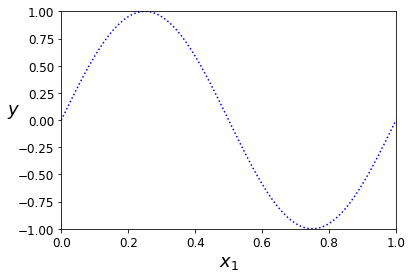

In [5]:
# plot dengan matplotlib. manual: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
plt.plot(sin_x, sin_y, "b:") # blue line
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 1, -1, 1])
# save_fig("simple_sin")
plt.show()

**make random train set**

In [2]:
import random

In [6]:
# membuat training set
random.seed(a=11)
np.random.seed(11)
s=random.getstate()
random_jumlah=11
train_x = np.random.rand(random_jumlah, 1)
train_y = np.ones(random_jumlah)
for i in range (random_jumlah):
    train_y[i] = math.sin(2*math.pi*train_x[i])+random.gauss(0,0.1)
    #random_y[i] = math.sin(2*math.pi*random_x[i])+random.random()*0.1
train_x

array([[0.18026969],
       [0.01947524],
       [0.46321853],
       [0.72493393],
       [0.4202036 ],
       [0.4854271 ],
       [0.01278081],
       [0.48737161],
       [0.94180665],
       [0.85079509],
       [0.72996447]])

In [8]:
# membuat validation set
random.seed(a=154341)
np.random.seed(11854)
s=random.getstate()
random_jumlah=10
valid_x = np.random.rand(random_jumlah, 1)
valid_y = np.ones(random_jumlah)
for i in range (random_jumlah):
    valid_y[i] = math.sin(2*math.pi*valid_x[i])+random.gauss(0,0.1)

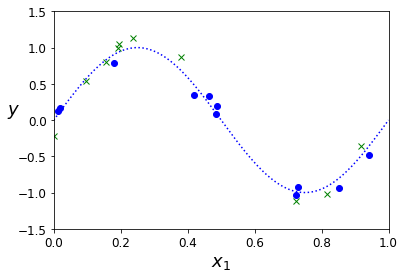

In [9]:

plt.plot(sin_x, sin_y, "b:",label='original function')
plt.plot(train_x, train_y, "bo",label='training set') # training set
plt.plot(valid_x, valid_y, "gx",label='validation set') # validation set


plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 1, -1.5, 1.5])
#save_fig("simple_sin_dataset")
plt.show()

In [10]:
report_train_mse=np.zeros(10)
report_valid_mse=np.zeros(10)

In [18]:
derajat_polinom=4
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=derajat_polinom, include_bias=False)
train_x_poly = poly_features.fit_transform(train_x)

In [19]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_x_poly, train_y)
lin_reg.intercept_, lin_reg.coef_

(0.043096384598618295,
 array([  6.46350143, -12.05609951,  -8.8895728 ,  14.65081422]))

In [20]:
train_y_predict=lin_reg.predict(train_x_poly)

In [21]:
train_y_predict.shape

(11,)

In [22]:
sin_x_poly=poly_features.fit_transform(sin_x)

In [23]:
sin_y_predict=lin_reg.predict(sin_x_poly)

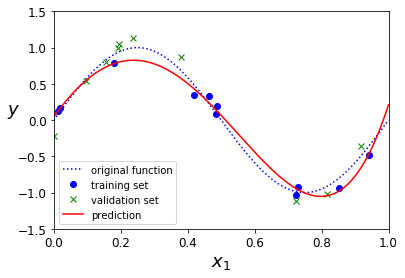

In [24]:
# grafik menunjukkan overfitting
plt.plot(sin_x, sin_y, "b:",label='original function')
plt.plot(train_x, train_y, "bo",label='training set') # training set
plt.plot(valid_x, valid_y, "gx",label='validation set') # validation set
plt.plot(sin_x, sin_y_predict, "r-",label='prediction')

plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 1, -1.50,1.50])

plt.legend(loc='lower left')
#save_fig("simple-sin-prediction")
plt.show()

In [25]:
lin_reg.intercept_, lin_reg.coef_

(0.043096384598618295,
 array([  6.46350143, -12.05609951,  -8.8895728 ,  14.65081422]))

In [26]:
lin_reg.intercept_, np.transpose(lin_reg.coef_)

(0.043096384598618295,
 array([  6.46350143, -12.05609951,  -8.8895728 ,  14.65081422]))

In [27]:
#menghitung MSE untuk training set


In [28]:
train_mse=sklearn.metrics.mean_squared_error(train_y, train_y_predict)

In [29]:
#menghitung MSE untuk validation set

In [30]:
valid_x_poly = poly_features.fit_transform(valid_x)

In [31]:
valid_y_predict=lin_reg.predict(valid_x_poly)

In [32]:
valid_mse=sklearn.metrics.mean_squared_error(valid_y, valid_y_predict)

In [33]:
report_train_mse[derajat_polinom]=train_mse
report_valid_mse[derajat_polinom]=valid_mse

In [34]:
report_train_mse

array([0.        , 0.        , 0.        , 0.        , 0.00299765,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [35]:
report_valid_mse

array([0.        , 0.        , 0.        , 0.        , 0.04737386,
       0.        , 0.        , 0.        , 0.        , 0.        ])

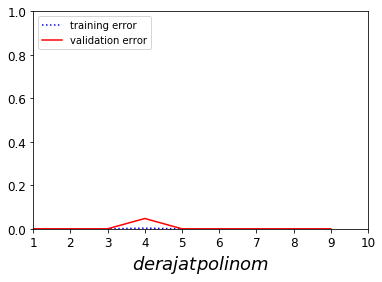

In [36]:
# validation vs training error, in terms of M
plt.plot(report_train_mse, "b:",label='training error')

plt.plot(report_valid_mse, "r-",label='validation error') # training set
plt.axis([1, 10, 0,1])
plt.legend(loc='upper left')
#save_fig("simple_sin_error")
plt.xlabel("$derajat polinom$", fontsize=18)
plt.show()